# Compile all model results

In [1]:
import pandas as pd
from glob import glob
from os.path import join, basename
from matplotlib import pyplot as plt
import seaborn as sns


IMPORT DES RESULTATS

In [3]:
wb

['/home/tbarba/projects/MultiModalBrainSurvival/outputs/raw_input/uVAE/uVAE_UCSF_b1e-3/multivariate/WB_oversampling.csv',
 '/home/tbarba/projects/MultiModalBrainSurvival/outputs/raw_input/uVAE/uVAE_UKB_b1e-4/multivariate/WB_oversampling.csv',
 '/home/tbarba/projects/MultiModalBrainSurvival/outputs/raw_input/uVAE/uVAE_UKB_b1e-3/multivariate/WB_oversampling.csv',
 '/home/tbarba/projects/MultiModalBrainSurvival/outputs/raw_input/UNet/UNet_UKB/multivariate/WB_oversampling.csv',
 '/home/tbarba/projects/MultiModalBrainSurvival/outputs/raw_input/UNet/UNet_UCSF/multivariate/WB_oversampling.csv',
 '/home/tbarba/projects/MultiModalBrainSurvival/outputs/raw_input/UNet/UNet_TCGA_segm/multivariate/WB_oversampling.csv',
 '/home/tbarba/projects/MultiModalBrainSurvival/outputs/raw_input/UNet/UNet_UKB_segm/multivariate/WB_oversampling.csv',
 '/home/tbarba/projects/MultiModalBrainSurvival/outputs/raw_input/UNet/UNet_UPENN/multivariate/WB_oversampling.csv',
 '/home/tbarba/projects/MultiModalBrainSurvival

In [31]:
MODELS = "/home/tbarba/projects/MultiModalBrainSurvival/outputs/"

raw_models = glob(join(MODELS, "raw_input/*/*/multivariate/*WB*over*g.csv"))
norm_results = glob(join(MODELS, "norm/test/*/multivariate/*WB*over*csv"))
rad_results = glob(join(MODELS, "norm/radiomics/*/multivariate/*WB*over*csv"))

radiomics = glob(join(MODELS, "radiomics/*/*/*WBrad*over*g.csv"))
wb = raw_models  + radiomics + norm_results + rad_results




def import_df(file):
    if "norm" in file:
        metadata = file.replace("test", "uVAE")
        if not "radiomics" in file:
            metadata = file.replace(file.split('/')[8],"uVAE_"+ file.split('/')[8])
    else:
        metadata = file
    
    print(file)

    n = 7 if "radiomics" in metadata else 8
    m = 2 if "radiomics" in metadata else 1
    
    input_form = metadata.split("/")[6]
    architecture = metadata.split("/")[7]
    dataset = metadata.split("/")[n].split("_")[m] 
    model = metadata.split("/")[n]
    segmentation = True if "_segm" in metadata else False
    model = "rad" if model =="WB" else model

    df = pd.read_csv(file)
    df["input_form"] = input_form
    df["architecture"] = architecture
    df["dataset"] = dataset
    df["model"] = model
    df["segmentation"] = segmentation
    # df = df.set_index(["architecture", "model", "dataset"])

    df=  df.replace("Gender", "Sex")

    return df


df = pd.concat([import_df(d) for d in wb], axis=0)#.set_index(["dataset", "architecture"]).sort_index()
df["performance"] = df["performance"].astype(float)

ukb_vars = pd.read_csv("/home/tbarba/projects/MultiModalBrainSurvival/data/MR/UKBIOBANK/metadata/0-variable_list.csv", index_col="category").sort_index()
tcga_vars = pd.read_csv("/home/tbarba/projects/MultiModalBrainSurvival/data/MR/TCGA/metadata/0-variable_list.csv", index_col="category").sort_index()
upenn_vars = pd.read_csv("/home/tbarba/projects/MultiModalBrainSurvival/data/MR/UPENN/metadata/0-variable_list.csv", index_col="category").sort_index()
ucsf_vars = pd.read_csv("/home/tbarba/projects/MultiModalBrainSurvival/data/MR/UCSF/metadata/0-variable_list.csv", index_col="category").sort_index()

variables = pd.concat([ukb_vars, tcga_vars, upenn_vars, ucsf_vars], axis=0).query("keep_model")["var"].reset_index()
df = pd.merge(df, variables, left_on="variable", right_on="var").drop("var", axis=1)

/home/tbarba/projects/MultiModalBrainSurvival/outputs/raw_input/uVAE/uVAE_UCSF_b1e-3/multivariate/WB_oversampling.csv
/home/tbarba/projects/MultiModalBrainSurvival/outputs/raw_input/uVAE/uVAE_UKB_b1e-4/multivariate/WB_oversampling.csv
/home/tbarba/projects/MultiModalBrainSurvival/outputs/raw_input/uVAE/uVAE_UKB_b1e-3/multivariate/WB_oversampling.csv
/home/tbarba/projects/MultiModalBrainSurvival/outputs/raw_input/UNet/UNet_UKB/multivariate/WB_oversampling.csv
/home/tbarba/projects/MultiModalBrainSurvival/outputs/raw_input/UNet/UNet_UCSF/multivariate/WB_oversampling.csv
/home/tbarba/projects/MultiModalBrainSurvival/outputs/raw_input/UNet/UNet_TCGA_segm/multivariate/WB_oversampling.csv
/home/tbarba/projects/MultiModalBrainSurvival/outputs/raw_input/UNet/UNet_UKB_segm/multivariate/WB_oversampling.csv
/home/tbarba/projects/MultiModalBrainSurvival/outputs/raw_input/UNet/UNet_UPENN/multivariate/WB_oversampling.csv
/home/tbarba/projects/MultiModalBrainSurvival/outputs/raw_input/UNet/UNet_UPENN

Synthèse

In [70]:
df.query("dataset == 'ADNI'")

,variable,split,performance,metric,ibs,variance,num_classes,N,missing_rate,model,restored,input_form,architecture,dataset,segmentation,category
452,Sex,1,0.8105,f1_weighted,NaN,1.0,2.0,190,0.0,WB_RAD_ADNI,False,radiomics,WB_RAD_ADNI,ADNI,False,global
453,Sex,2,0.8368,f1_weighted,NaN,1.0,2.0,190,0.0,WB_RAD_ADNI,False,radiomics,WB_RAD_ADNI,ADNI,False,global
454,Sex,3,0.7947,f1_weighted,NaN,1.0,2.0,190,0.0,WB_RAD_ADNI,False,radiomics,WB_RAD_ADNI,ADNI,False,global
455,Sex,4,0.8053,f1_weighted,NaN,1.0,2.0,190,0.0,WB_RAD_ADNI,False,radiomics,WB_RAD_ADNI,ADNI,False,global
456,Sex,5,0.8368,f1_weighted,NaN,1.0,2.0,190,0.0,WB_RAD_ADNI,False,radiomics,WB_RAD_ADNI,ADNI,False,global


Text(0.5, 1.0, 'ADNI')

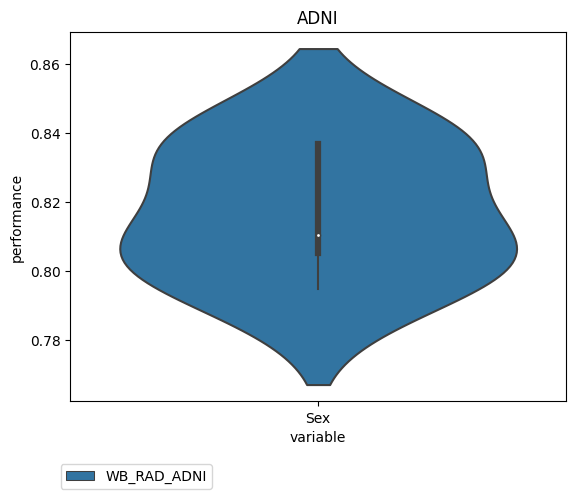

In [69]:
dataset = "ADNI"
models = ["AE_ADNI_segm","UNet_ADNI_segm", "WB_RAD_ADNI"]
sub = df.query("dataset == @dataset and model in @models")
sns.violinplot(sub, x="variable", y="performance", hue="model")
plt.legend(bbox_to_anchor=(0.3, -0.15))
plt.title(dataset)


In [71]:
import seaborn as sns
from matplotlib import pyplot as plt
from pathlib import Path
import pandas as pd
results = Path("/home/tbarba/projects/MultiModalBrainSurvival/results/fused2").glob("*.csv")
results = {f.name: pd.read_csv(f) for f in results}
for f, df in results.items():
    df["dataset"], df["model"] = f.split("_")[0], f.split("_")[1]
    if "AE_single" in f:
        df["model"] = "AE_single"
    if "UVAE_single" in f:
        df["model"] = "UVAE_single"

fused_df = pd.concat([f for f in results.values()])

In [97]:
fused_df.dataset.value_counts()

dataset
UKB       745
TCGA       80
SCHIZO     80
ADNI       60
UPENN      45
UCSF       45
Name: count, dtype: int64

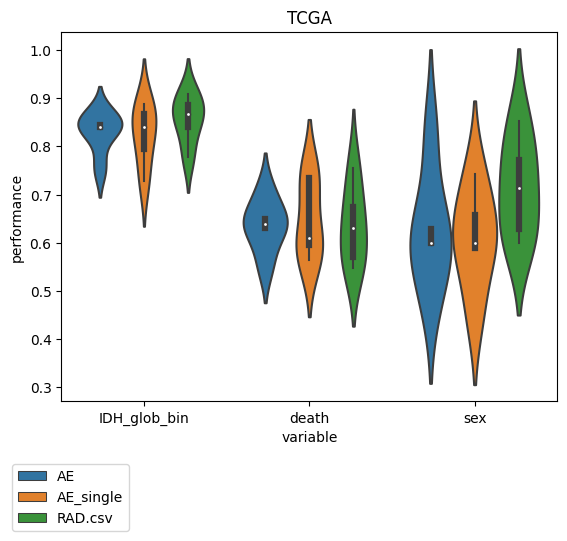

In [109]:


for dataset in ["TCGA"]:
    plt.figure()
    sub = fused_df.query("dataset == @dataset and 'UVAE_single' not in model and 'grade' not in variable").sort_values(by=["model", "variable"])
    sns.violinplot(sub, x = "variable", y="performance", hue="model")
    plt.legend(bbox_to_anchor=(0.15, -0.15))
    plt.title(dataset)


In [96]:
pd.read_csv("/home/tbarba/projects/MultiModalBrainSurvival/outputs/test/TCGA/exports/features/wb_and_radiomics.csv.gz").shape

(167, 8409)